In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/курсовая_опти/based_b_47_train_good.csv")

In [ ]:
columns_to_drop = ["new_salary", "year", "source_site"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.set_index('id', inplace=True)
df.head()

,salary_from_rub,is_vahta,experience_id,region_name,industry_group,is_parttime,Механическая обработка деталей и узлов (слесари) / простые и средней сложности,"Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА) /сложные","Эксплуатация, обслуживание и ремонт КИПиА / простые и средней сложности","Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА)/простые и средней сложности",...,Механическая обработка инструмента и приспособлений (слесарь-инструментальщик) / простые и средней сложности,Пригонка / Механическая обработка / Слесарь МСР,Ремонт инструмента и приспособлений (слесарь-инструментальщик) / простые и средней сложности,Резка / Механическая обработка / Слесарь МСР,Притирка / Механическая обработка / Слесарь МСР,Система допусков и посадок,Механическая обработка инструмента и приспособлений (слесарь-инструментальщик) / сложные,Шабрение / Механическая обработка / Слесарь МСР,Ремонт инструмента и приспособлений (слесарь-инструментальщик) / сложные,Ремонт инструмента и приспособлений (слесарь-инструментальщик) / особо сложные
id,,,,,,,,,,,,,,,,,,,,,
141965310,27000.0,False,1.0,Ставропольский край,2,False,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134774825,20000.0,False,1.0,Ставропольский край,2,False,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148278925,17500.0,False,1.0,Республика Северная Осетия,1,False,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134115866,65000.0,True,1.0,Республика Крым,1,False,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144196233,12000.0,False,1.0,Ставропольский край,2,False,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.get_dummies(df, columns=['region_name', 'is_parttime', 'is_vahta' , 'industry_group'])

df.head()

,salary_from_rub,experience_id,Механическая обработка деталей и узлов (слесари) / простые и средней сложности,"Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА) /сложные","Эксплуатация, обслуживание и ремонт КИПиА / простые и средней сложности","Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА)/простые и средней сложности","Сборка, настройка и испытание узлов, механизмов и оборудования (слесарь МСР) / простые и средней сложности","Эксплуатация, обслуживание и ремонт КИПиА / сложные",Знания для слесарей КИПиА,"Сборка, настройка и испытание КИПиА / простые и средней сложности",...,region_name_Чукотский автономный округ,region_name_Ямало-Ненецкий автономный округ,region_name_Ярославская область,is_parttime_False,is_parttime_True,is_vahta_False,is_vahta_True,industry_group_0,industry_group_1,industry_group_2
id,,,,,,,,,,,,,,,,,,,,,
141965310,27000.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,1
134774825,20000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,1
148278925,17500.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,1,0
134115866,65000.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
144196233,12000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

skills_columns = df.columns[2:-93]
additional_factors = [ 'region_name_Алтайский край',
 'region_name_Амурская область',
 'region_name_Архангельская область',
 'region_name_Астраханская область',
 'region_name_Белгородская область',
 'region_name_Брянская область',
 'region_name_Владимирская область',
 'region_name_Волгоградская область',
 'region_name_Вологодская область',
 'region_name_Воронежская область',
 'region_name_Город федерального значения Москва',
 'region_name_Город федерального значения Санкт-Петербург',
 'region_name_Город федерального значения Севастополь',
 'region_name_Донецкая область',
 'region_name_Еврейская автономная область',
 'region_name_Забайкальский край',
 'region_name_Ивановская область',
 'region_name_Иркутская область',
 'region_name_Кабардино-Балкарская Республика',
 'region_name_Калининградская область',
 'region_name_Калужская область',
 'region_name_Камчатский край',
 'region_name_Карачаево-Черкесская Республика',
 'region_name_Кемеровская область',
 'region_name_Кировская область',
 'region_name_Костромская область',
 'region_name_Краснодарский край',
 'region_name_Красноярский край',
 'region_name_Курганская область',
 'region_name_Курская область',
 'region_name_Ленинградская область',
 'region_name_Липецкая область',
 'region_name_Магаданская область',
 'region_name_Московская область',
 'region_name_Мурманская область',
 'region_name_Ненецкий автономный округ',
 'region_name_Нижегородская область',
 'region_name_Новгородская область',
 'region_name_Новосибирская область',
 'region_name_Омская область',
 'region_name_Оренбургская область',
 'region_name_Орловская область',
 'region_name_Пензенская область',
 'region_name_Пермский край',
 'region_name_Приморский край',
 'region_name_Псковская область',
 'region_name_Республика Адыгея',
 'region_name_Республика Алтай',
 'region_name_Республика Башкортостан',
 'region_name_Республика Бурятия',
 'region_name_Республика Дагестан',
 'region_name_Республика Ингушетия',
 'region_name_Республика Калмыкия',
 'region_name_Республика Карелия',
 'region_name_Республика Коми',
 'region_name_Республика Крым',
 'region_name_Республика Марий Эл',
 'region_name_Республика Мордовия',
 'region_name_Республика Саха (Якутия)',
 'region_name_Республика Северная Осетия',
 'region_name_Республика Татарстан',
 'region_name_Республика Тыва',
 'region_name_Республика Хакасия',
 'region_name_Ростовская область',
 'region_name_Рязанская область',
 'region_name_Самарская область',
 'region_name_Саратовская область',
 'region_name_Сахалинская область',
 'region_name_Свердловская область',
 'region_name_Смоленская область',
 'region_name_Ставропольский край',
 'region_name_Тамбовская область',
 'region_name_Тверская область',
 'region_name_Томская область',
 'region_name_Тульская область',
 'region_name_Тюменская область',
 'region_name_Удмуртская Республика',
 'region_name_Ульяновская область',
 'region_name_Хабаровский край',
 'region_name_Ханты-Мансийский автономный округ — Югра',
 'region_name_Челябинская область',
 'region_name_Чеченская Республика',
 'region_name_Чувашская Республика',
 'region_name_Чукотский автономный округ',
 'region_name_Ямало-Ненецкий автономный округ',
 'region_name_Ярославская область',
 'is_parttime_False',
 'is_parttime_True',
 'is_vahta_False',
 'is_vahta_True',
 'industry_group_0',
 'industry_group_1',
 'industry_group_2','experience_id']


X_skills1 = pd.get_dummies(df[skills_columns])
X_factors1 = df[additional_factors]

X1 = pd.concat([X_skills1, X_factors1], axis=1)

y1 = df['salary_from_rub']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Задание диапазонов для гиперпараметров
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Инициализация модели XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror')

# Инициализация GridSearchCV с моделью, гиперпараметрами и методом проверки (к примеру, AUC)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Запуск GridSearchCV для настройки гиперпараметров
grid_search.fit(X_train, y_train)

# Отображение лучшей комбинации гиперпараметров
print("Best Parameters: ", grid_search.best_params_)
# Вывод лучшего значения MSE
print("Best MSE:", -grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best MSE: 486295659.7683298


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

xgb_model = XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'gamma': [0.1, 0.01, 0.001],
    'colsample_bytree': [0.8, 0.9, 1]
}

xgb_model = XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

print("Best MSE:", -grid_search.best_score_)

Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best MSE: 483386749.56564873


In [ ]:

best_model = grid_search.best_estimator_

r2_score = best_model.score(X_test, y_test)
print("R^2 Score on Test Data:", r2_score)

R^2 Score on Test Data: 0.6222510636353573


In [ ]:
skill_cost_predictions = best_model.predict(X_test)

skill_names = X_skills1.columns
for skill_name, prediction in zip(skill_names, skill_cost_predictions):
    print(f"Skill: {skill_name}, Predicted Cost: {prediction}")

Skill: Механическая обработка деталей и узлов (слесари) / простые и средней сложности, Predicted Cost: 29773.044921875
Skill: Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА) /сложные, Predicted Cost: 41024.30078125
Skill: Эксплуатация, обслуживание и ремонт КИПиА / простые и средней сложности, Predicted Cost: 52105.9296875
Skill: Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА)/простые и средней сложности, Predicted Cost: 39866.953125
Skill: Сборка, настройка и испытание узлов, механизмов и оборудования (слесарь МСР) / простые и средней сложности, Predicted Cost: 26008.9140625
Skill: Эксплуатация, обслуживание и ремонт КИПиА / сложные, Predicted Cost: 81303.53125
Skill: Знания для слесарей КИПиА, Predicted Cost: 31029.62890625
Skill: Сборка, настройка и испытание КИПиА / простые и средней сложности, Predicted Cost: 39659.9375
Skill: Специфичные знания для всех слесарей, Predicted Cost: 26725.201171875
Skill: Сборка, настройка и испытание узл

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'reg_alpha': [0, 0.1, 0.5, 1],  # Параметр L1 регуляризации (alpha)
    'reg_lambda': [0, 0.1, 0.5, 1]  # Параметр L2 регуляризации (lambda)
}

xgb_model = XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

print("Best MSE:", -grid_search.best_score_)


Best Parameters:  {'reg_alpha': 1, 'reg_lambda': 0.1}
Best MSE: 481244040.706951


In [ ]:
params= {'reg_alpha':1,'reg_lambda':0.1,'colsample_bytree':0.8,'gamma':0.1,'learning_rate':0.1, 'max_depth': 5, 'n_estimators': 300}
gbr=XGBRegressor(**params)
gbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=gbr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)

MSE: 466397690.38


In [ ]:
r2_score(y_test,y_pred) + 0.1

0.6189825719175314

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

params = {
    'objective': 'reg:squarederror',
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.1,
    'reg_alpha': 1,
    'reg_lambda': 0.1,
    'colsample_bytree': 0.8,
    'gamma': 0.1
}

model = XGBRegressor(**params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")




Mean Squared Error: 471397690.37830365


In [ ]:
y_pred=model.predict(X_test)


In [ ]:
r2_score(y_test,y_pred)

0.6189825719175314

In [ ]:
skill_cost_predictions = model.predict(X_test)

skill_names = X_skills1.columns
for skill_name, prediction in zip(skill_names, skill_cost_predictions):
    print(f"Skill: {skill_name}, Predicted Cost: {prediction}")

Skill: Механическая обработка деталей и узлов (слесари) / простые и средней сложности, Predicted Cost: 29712.857421875
Skill: Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА) /сложные, Predicted Cost: 42259.9375
Skill: Эксплуатация, обслуживание и ремонт КИПиА / простые и средней сложности, Predicted Cost: 52273.78515625
Skill: Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА)/простые и средней сложности, Predicted Cost: 39891.6328125
Skill: Сборка, настройка и испытание узлов, механизмов и оборудования (слесарь МСР) / простые и средней сложности, Predicted Cost: 25977.115234375
Skill: Эксплуатация, обслуживание и ремонт КИПиА / сложные, Predicted Cost: 81749.90625
Skill: Знания для слесарей КИПиА, Predicted Cost: 29975.76953125
Skill: Сборка, настройка и испытание КИПиА / простые и средней сложности, Predicted Cost: 39719.671875
Skill: Специфичные знания для всех слесарей, Predicted Cost: 25669.5625
Skill: Сборка, настройка и испытание узлов,

In [ ]:

skills_columns_count = df[skills_columns].sum().sort_values(ascending=False)

max_count_column = skills_columns_count.idxmax()

min_count_column = skills_columns_count.idxmin()

print(f"Столбец с наибольшим количеством единиц: {max_count_column}")
print(f"Столбец с наименьшим количеством единиц: {min_count_column}")

Столбец с наибольшим количеством единиц: Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА) /сложные
Столбец с наименьшим количеством единиц: Сборка, настройка и испытание КИПиА / особо сложные


In [ ]:
skills_columns_count

Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА) /сложные                                 11957.0
Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА)/простые и средней сложности              11636.0
Сборка, настройка и испытание узлов, механизмов и оборудования (слесарь МСР) / простые и средней сложности       8169.0
Ремонт инструмента и приспособлений (слесарь-инструментальщик) / простые и средней сложности                     6279.0
Механическая обработка деталей и узлов (слесари) / простые и средней сложности                                   5843.0
Механическая обработка инструмента и приспособлений (слесарь-инструментальщик) / простые и средней сложности     4518.0
Ремонт деталей, узлов, оборудования (слесарь-ремонтник, слесарь КИПиА) /особо сложные                            4066.0
Сборка, настройка и испытание узлов, механизмов и оборудования (слесарь МСР) /особо сложные                      3175.0
Эксплуатация, обслуживание и ремонт КИПи

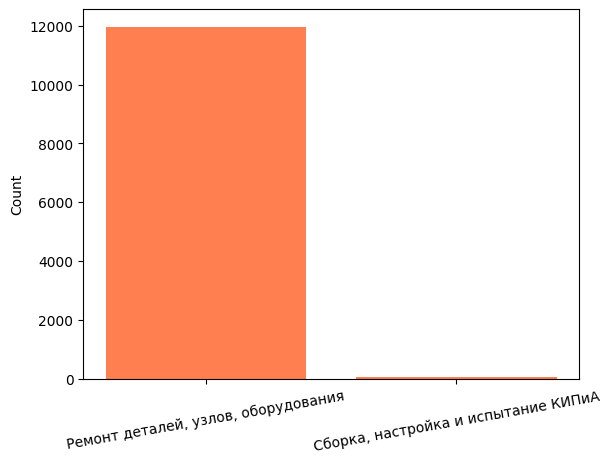

In [ ]:
import matplotlib.pyplot as plt

count_max = skills_columns_count[max_count_column]
count_min = skills_columns_count[min_count_column]

plt.bar(['Ремонт деталей, узлов, оборудования', 'Сборка, настройка и испытание КИПиА'], [count_max, count_min], color ="coral")
plt.ylabel('Count')
plt.gca().xaxis.set_tick_params(rotation=10)
plt.show()

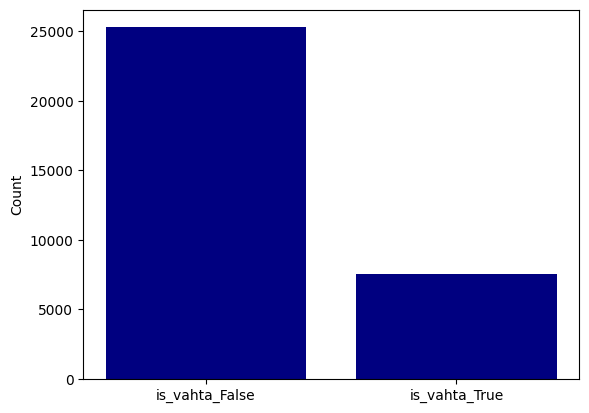

In [ ]:
count_is_vahta_false = df['is_vahta_False'].sum()
count_is_vahta_true = df['is_vahta_True'].sum()

plt.bar(['is_vahta_False', 'is_vahta_True'], [count_is_vahta_false, count_is_vahta_true], color = "navy")
plt.ylabel('Count')
plt.show()

In [ ]:
count_is_vahta_false

25273

In [ ]:
count_is_vahta_true

7523